In [1]:
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd
from obspy.geodetics.base import gps2dist_azimuth

## Import data

In [2]:
mat = io.loadmat('class 2/matfiles/Arr.mat')
GPStime = pd.read_csv('gpstime.csv',names=['time'])
GPSlat = pd.read_csv('gps_lat.csv',names=['AUV','Buoy','Ship'])
GPSlon = pd.read_csv('gps_lon.csv',names=['AUV','Buoy','Ship'])

In [3]:
rows = mat['Arr'][0]  ## 6
columns = mat['Arr'][0][0] ##7
time = mat['Arr'][0][0][0] ##121
data = mat['Arr'][0][0][0][0] ##3000

In [4]:
mdata = mat['Arr']
mdtype = mat['Arr'].dtype
BuoytoShip_data = {n: mdata[n][0,3] for n in mdtype.names}
ShiptoBuoy_data = {n: mdata[n][0,5] for n in mdtype.names}


## Plot data

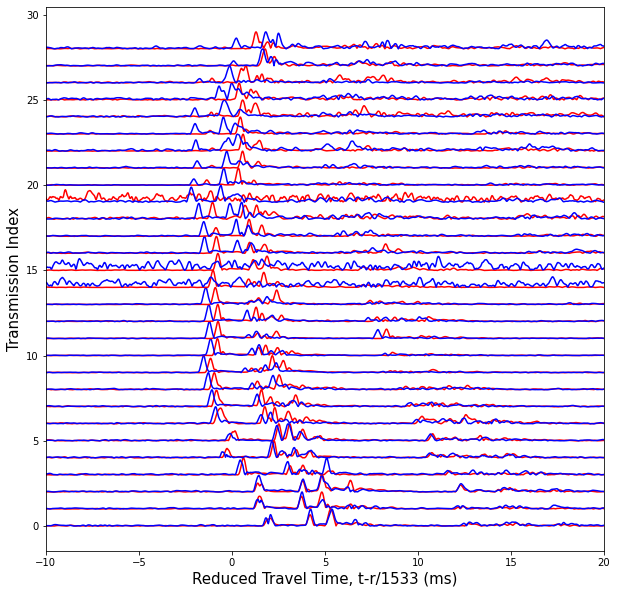

In [9]:
plt.figure(figsize=(10,10))
vel = 1533
for i in range(29):
    
    Buoy_lat = 25+GPSlat['Buoy'].values[i]/60
    Buoy_lon = 121+GPSlon['Buoy'].values[i]/60
    Ship_lat = 25+GPSlat['Ship'].values[i]/60
    Ship_lon = 121+GPSlon['Ship'].values[i]/60
    dist,az,baz = gps2dist_azimuth(Ship_lat,Ship_lon,Buoy_lat,Buoy_lon)
    # print(dist)
    plt.plot((ShiptoBuoy_data['time'][i]-dist/vel)*1000,ShiptoBuoy_data['arr'][i]/max(ShiptoBuoy_data['arr'][i])+i,'r')
    plt.plot((BuoytoShip_data['time'][i]-dist/vel)*1000,BuoytoShip_data['arr'][i]/max(BuoytoShip_data['arr'][i])+i,'b')
plt.xlim(-10,20)
plt.xlabel('Reduced Travel Time, t-r/1533 (ms)',fontsize=15)
plt.ylabel('Transmission Index',fontsize=15)
plt.show()

## Import bellhop amp. (delayandsum)

In [6]:
envelop = pd.read_csv('time_001/envelop.csv')

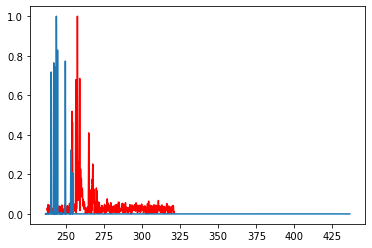

In [7]:
plt.plot((ShiptoBuoy_data['time'][2])*1000,ShiptoBuoy_data['arr'][2]/max(ShiptoBuoy_data['arr'][2]),'r')
plt.plot((envelop['time'])*1000,envelop['envelop']/(max(envelop['envelop'])))

# plt.xlim(235,260)

In [8]:
dist/1533

0.8132953667317695